# _Dataset Sanction Eco_
***semaine Random Forest***

In [3]:
#! pip install missingno

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import missingno as msno

## _Découverte des données_

In [9]:
df =  pd.read_excel('..\DATABASE.xls', skiprows=2, header=1)

In [16]:
df.dtypes.count()

39

In [11]:
df.head()

,Case no.b,Sender c,Sender 2c,Sender 3c,Targetd,Goal,US casee,US unilateral casef,Foreign policy goal categoryg,First yearh,...,Cost to target per capitabb,Trade linkagecc,GNP \nratiodd,Health and stabilityee,Sanction typeff,Cost to sendergg,"GDP growth (percent, 5-year average)hh","Inflation (percent,\n 3-year average)ii",Target International Monetary Fund codejj,Country groupkk
0,14-1,UNITED KINGDOM,NaN,NaN,GERMANY,Military victory,0.0,0.0,4.0,1914.0,...,12.58,9,1.0,3.0,"F,X,M",4.0,3.58,2.86667,134,1.0
1,17-1,UNITED STATES,NaN,NaN,JAPAN,Shipping for Allies,1.0,1.0,5.0,1917.0,...,0.44,20.5,13.0,3.0,X,2.0,5.4,25.6,158,1.0
2,18-1,UNITED KINGDOM,NaN,NaN,RUSSIA,Destabilize Bolsheviks,0.0,0.0,2.0,1918.0,...,2.49,18.5,1.0,1.0,"F,X,M",3.0,n.a.,n.a.,922,2.0
3,21-1,LEAGUE OF NATIONS,NaN,NaN,YUGOSLAVIA,Military disruption vs. Albania,0.0,0.0,3.0,1921.0,...,--,26.5,37.0,2.0,--,2.0,-1.5,n.a.,188,2.0
4,25-1,LEAGUE OF NATIONS,NaN,NaN,GREECE,Withdraw from Bulgaria,0.0,0.0,3.0,1925.0,...,--,36,56.0,2.0,--,2.0,3.3,48.8,174,1.0


In [17]:
df.shape

(246, 39)

In [18]:
df.columns

Index(['Case no.b', 'Sender c', 'Sender 2c', 'Sender 3c', 'Targetd', 'Goal',
       'US casee', 'US unilateral casef', 'Foreign policy goal categoryg',
       'First yearh', 'Last yeari', 'Policy resultj',
       'Sanctions contributionk', 'Success \nscorel', 'Companion policiesm',
       'International cooperationn', 'International assistanceo',
       'Cooperating international organizationp',
       'International organization senderq',
       'International organization sender & target membersr',
       'Length (years)s', 'Prior relationst',
       'Regime Type \n(DEMOC 1st year)u', 'Regime Type2 (Polity2 1st year)v',
       'Regime Type3 \n(Scale 1st year)w', 'Political stability priorx',
       'Political stability duringy', 'Cost to targetz',
       'Cost to target (percent of GNP)aa', 'Cost to target per capitabb',
       'Trade linkagecc', 'GNP \nratiodd', 'Health and stabilityee',
       'Sanction typeff', 'Cost to sendergg',
       'GDP growth (percent, 5-year average)hh',
 

### Séparation des commentaires sur les cols  
Qui se trouvent dans les 42 dernières lignes du DF

In [19]:
#row -42 to end, first col
df_comment = df.iloc[-42:,0]

In [20]:
df_comment.index

RangeIndex(start=204, stop=246, step=1)

In [21]:
#drop 5 useless rows
df_comment.drop(df.index[204:209], inplace = True)

In [22]:
#reindex a partir de 0
df_comment=df_comment.reset_index(drop=True)

- choisir l'index d'une ligne pour voire un commentaire correspondant à une col.

In [23]:
df_comment[:]

0     a. This is the database used for the statistic...
1     b. Cases involving multiple goals, phases, or ...
2     c. The sender, in some cases more than one, ta...
3     d. The target is the country against which san...
4     e. A dummy variable equal to 1 when the US is ...
5     f. A dummy variable equal to 1 when the US imp...
6     g. The numbers in this column correspond to th...
7     h. This is the year of the first recorded sanc...
8     i. This is the year when the case ends, either...
9     j. The policy result indicates the extent to w...
10    k. The sanctions contribution indicates the ex...
11    l. The success score is an index on a scale of...
12    m. Types of companion policies are covert acti...
13    n. The extent of international cooperation wit...
14    o. International assistance to target, indicat...
15    p. A cooperating international organization is...
16    q. A dummy variable where 1 indicates that an ...
17    r. A dummy variable where 1 indicates that

***

### Type de valeurs présentes

In [26]:
dataTypeDf = pd.DataFrame(df.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
dataTypeDf.head()

,variableType,count
0,object,23
1,float64,16


In [24]:
dataTypeDf = pd.DataFrame(df.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})

fig,ax = plt.subplots()
fig.set_size_inches(20,5)

sn.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

TypeError: data type "" not understood

TypeError: data type "" not understood

<Figure size 1440x360 with 1 Axes>

### Données manquantes

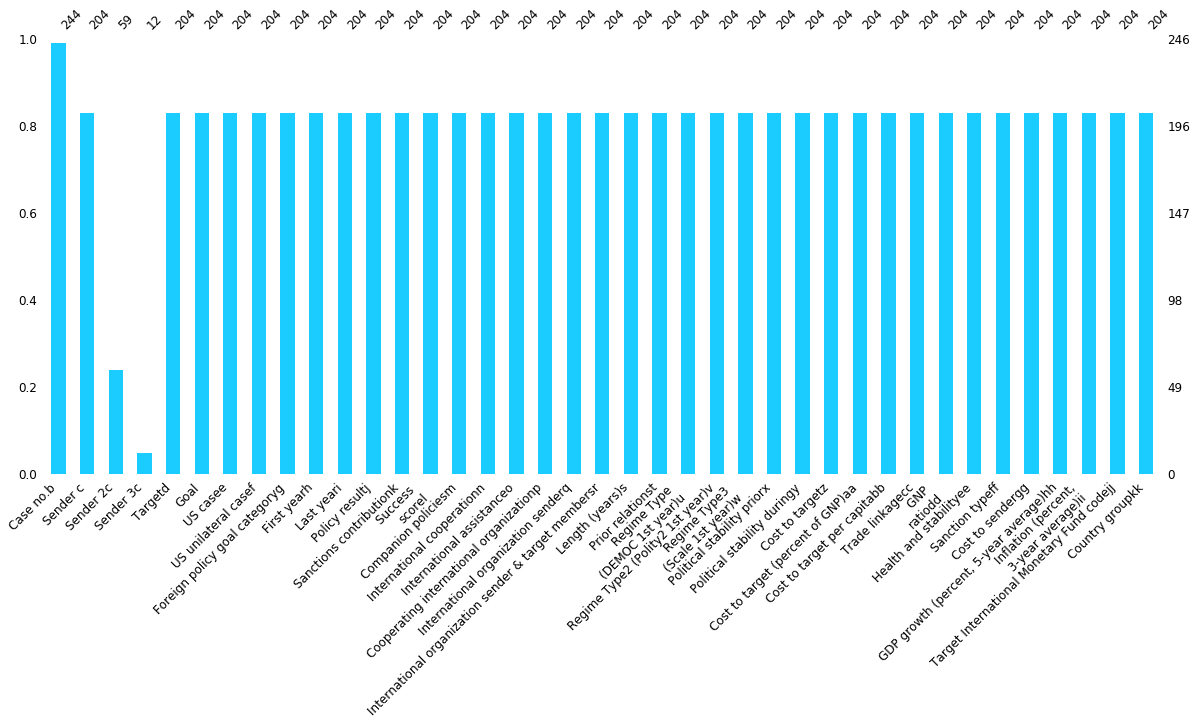

In [27]:
val_manq = df.columns[df.isnull().any()].tolist()

msno.bar(df[val_manq],\
            figsize=(20,8),color=(0.1, 0.8, 1),fontsize=12,labels=True,)

In [28]:
df.iloc[20]

Case no.b                                                                                 48-3
Sender c                                                                                  USSR
Sender 2c                                                                                  NaN
Sender 3c                                                                                  NaN
Targetd                                                UNITED STATES, (UNITED KINGDOM, FRANCE)
Goal                                                                           Berlin blockade
US casee                                                                                     0
US unilateral casef                                                                          0
Foreign policy goal categoryg                                                                5
First yearh                                                                               1948
Last yeari                                        

In [29]:
len(val_manq)

39

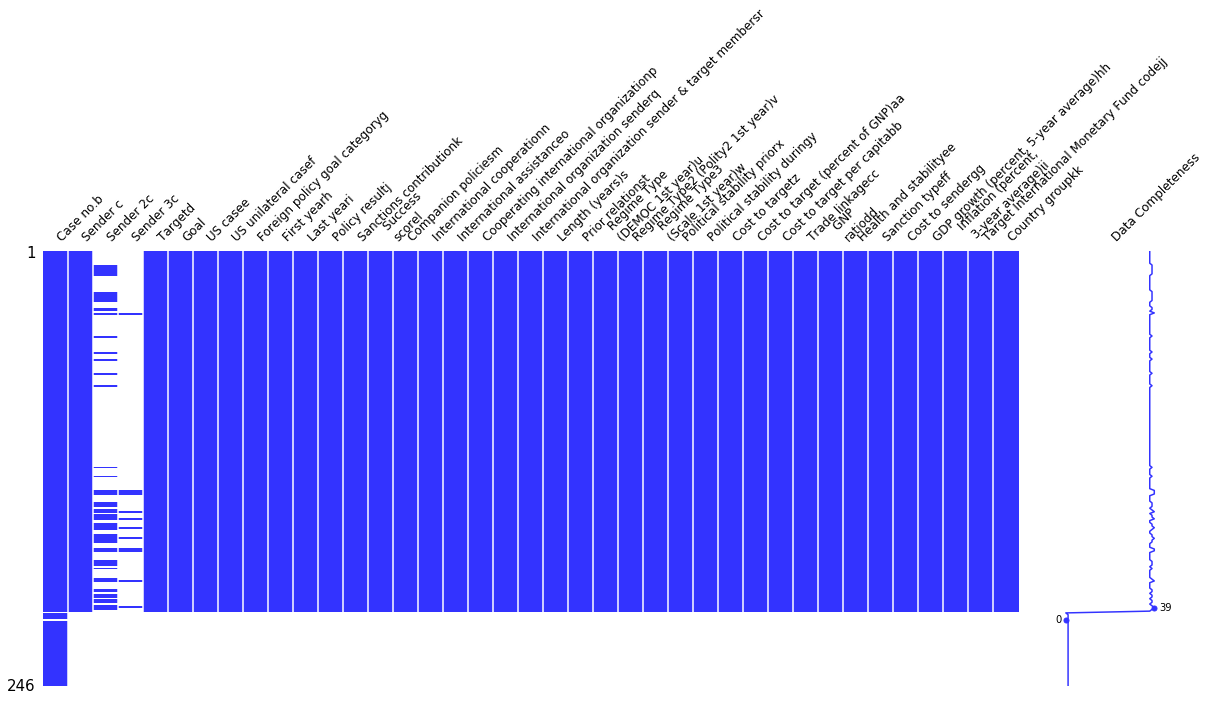

In [30]:
msno.matrix(df[val_manq],width_ratios=(10,1), figsize=(20,8),color=(0.2, 0.2, 1),fontsize=12,sparkline=True,labels=True)

In [31]:
df.columns

Index(['Case no.b', 'Sender c', 'Sender 2c', 'Sender 3c', 'Targetd', 'Goal',
       'US casee', 'US unilateral casef', 'Foreign policy goal categoryg',
       'First yearh', 'Last yeari', 'Policy resultj',
       'Sanctions contributionk', 'Success \nscorel', 'Companion policiesm',
       'International cooperationn', 'International assistanceo',
       'Cooperating international organizationp',
       'International organization senderq',
       'International organization sender & target membersr',
       'Length (years)s', 'Prior relationst',
       'Regime Type \n(DEMOC 1st year)u', 'Regime Type2 (Polity2 1st year)v',
       'Regime Type3 \n(Scale 1st year)w', 'Political stability priorx',
       'Political stability duringy', 'Cost to targetz',
       'Cost to target (percent of GNP)aa', 'Cost to target per capitabb',
       'Trade linkagecc', 'GNP \nratiodd', 'Health and stabilityee',
       'Sanction typeff', 'Cost to sendergg',
       'GDP growth (percent, 5-year average)hh',
 

In [129]:
df['Cost to target per capitabb']

0      12.58
1       0.44
2       2.49
3         --
4         --
       ...  
241      NaN
242      NaN
243      NaN
244      NaN
245      NaN
Name: Cost to target per capitabb, Length: 246, dtype: object

TypeError: '<' not supported between instances of 'str' and 'float'

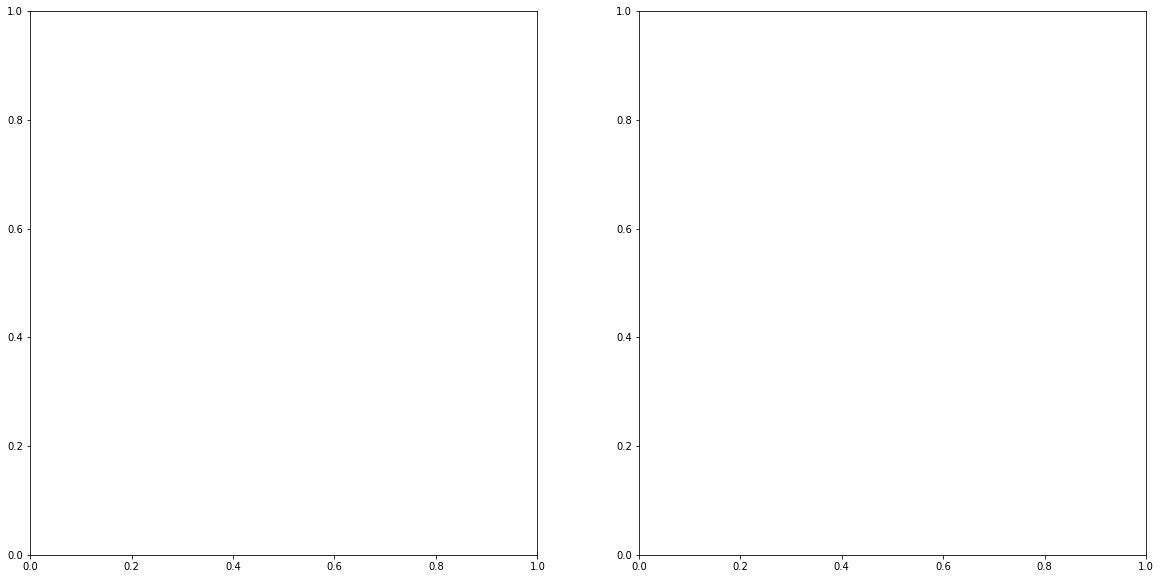

In [128]:
fig,axes = plt.subplots(ncols=2)
fig.set_size_inches(20, 10)
stats.probplot(df["Cost to target per capitabb"], dist='norm', fit=True, plot=axes[0])
stats.probplot(np.log1p(df["Cost to target per capitabb"]), dist='norm', fit=True, plot=axes[1])

![title](img1.png)

>* $D$  Courbe d'Offre; Rapport Quantité/prix
>* $Q$  Quantité pour un prix $P$
>* $P$  Prix pour pour une Quantité $Q$
>* $S$  Droite de retrait de l'offre disponiable via l'émetteur 
>* $𝑑𝑃$  

*Commentaires : L'équilibre initial entre offre et demande d'un bien ($E1$) sur le marché du pays cible correspond à la vente par ses fournisseurs (dont le pays émet- teur) d'une quantité $Q1$ de bien à un prix $P1$.*  

*Lors de l'entrée en vigueur de la sanction « restriction sur les importations par le pays cible », la quantité fournie au pays cible diminue jusqu'à $Q1$'. Ce retrait d'un fournisseur entraîne un mouvement de la courbe d'offre de $S1$ vers $S2$. Lorsque l'émetteur de la sanction n'est pas en situation de monopole ou que la sanction n'est pas universelle, la cible peut se tourner vers des fournisseurs alternatifs (profitant d'un plus grand pouvoir de marché) ou des biens produits localement à un coût plus élevé pour obtenir une quantité supérieure $Q2$ de bien à un prix $P2$*

*À moyen terme, l'offre adressée au pays cible s'ajuste (équilibre en $E3$) avec l'entrée sur le marché de nouveaux producteurs ou l'adaptation des facteurs de production pour profiter des opportunités liées au départ du pays émetteur. Le degré d'ajustement dépend de la substituabilité du bien (si la substituabilité est totale, $S3$ se superpose à $S1$).*  

*Ainsi, l'impact réel sur le bien-être du pays cible de la sanction est la perte nette, représentée en rouge, qui traduit la baisse des quantités et la hausse des prix de chaque unité de bien ($dP$).  
Pour le pays émetteur, la perte de chiffre d'affaire est représentée par le rectangle coloré, perte qui peut être réduite par d'éventuelles réexportations sur des marchés alternatifs. Cette perte de marché peut potentiellement se traduire par une perte de bien-être supérieure à celle subie par le pays cible.*